525601
43801


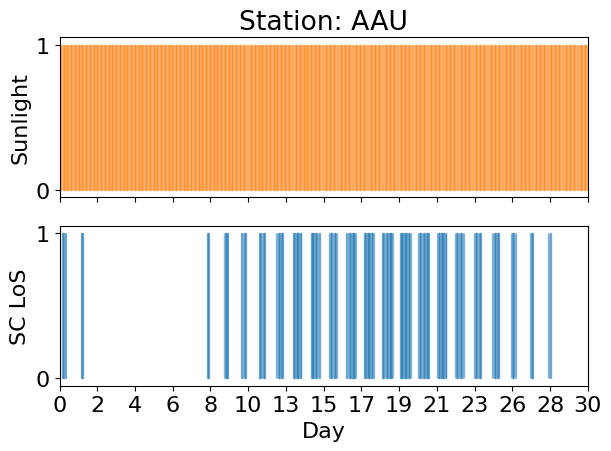

In [12]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
# %matplotlib widget
path="../station_AAU_rate_59677090"
# path="station_NN11_rate_404820636"
with open(f"{path}/som.pickle", 'rb') as f:
    sun_light_init = pickle.load(f)
f.close()
with open(f"{path}/los.pickle", "rb") as f:
    los_sc_init = pickle.load(f)
f.close()
with open(f"{path}/rd.pickle", "rb") as f:
    Rdl_init = pickle.load(f)
f.close()
with open(f"{path}/rs.pickle", "rb") as f:
    Rsc_init = pickle.load(f)
f.close()
with open(f"{path}/gwlos.pickle", "rb") as f:
    gw_los_init = pickle.load(f)
f.close()
with open(f"{path}/gwr.pickle", "rb") as f:
    gw_rate_init = pickle.load(f)
f.close()
Rsc=Rsc_init
Rdl=Rdl_init
N=len(sun_light_init)
print(N)
M=100
n = 0
l= int(N/12)+1 #N
print(l)
# Draw a vertical line at a specific point, for example at x=10000
day=28
min=(43800/30)*day
# plt.axvline(x=min, color='red', linestyle='--', label=f'{day}')

# plt.step(range(l), sun_light_init[:l], label="sun light")
# plt.step(range(l), los_sc_init[:l], label="sc los")
# plt.step(range(l), gw_los_init[:l], label="gateway")

# Fill areas where sun_light_init is high (e.g., True or >0)
# plt.rcParams.update({'font.size': 15})
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)#, figsize=(10, 5), gridspec_kw={'height_ratios': [1, 1]})

# Sun light plot
ax1.fill_between(range(l), 0, 1, where=sun_light_init[n:n+l] > 0, color='tab:orange', alpha=0.5, label='sun light')
ax1.set_yticks([0, 1])
ax1.set_ylabel("Sunlight")
# ax1.legend(loc="center left")
station = path.split("_")[1]
if station == "NN11":
    station = "NN"
ax1.set_title(f"Station: {station}")

# sc LoS plot
ax2.fill_between(range(l), 0, 1, where=los_sc_init[n:n+l] > 0, color='tab:blue', alpha=0.5, label='sc LoS')
ax2.set_yticks([0, 1])
ax2.set_ylabel("SC LoS")
ax2.set_xlabel("Day")
# ax2.legend(loc="center left")
plt.rcParams.update({'font.size': 16})
plt.xticks(
    ticks=np.linspace(0, l, num=15),
    labels=[f"{int(tick/1440)}" for tick in np.linspace(0, l, num=15)]
)
plt.xlim(0, l)
plt.tight_layout()
plt.savefig(f"data_{station}.pdf", format="pdf", bbox_inches="tight")
plt.show()

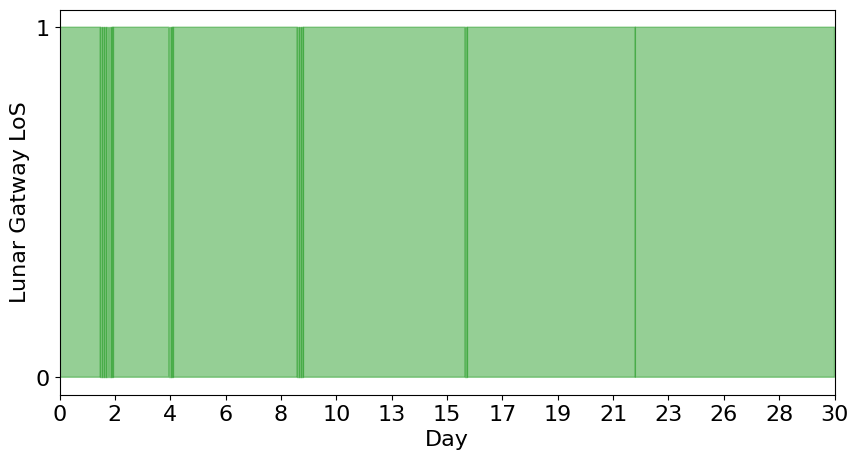

In [13]:
plt.figure(figsize=(10, 5))

plt.fill_between(range(l), 0, 1, where=gw_los_init[:l] > 0, color='tab:green', alpha=0.5, label='gateway LoS')
# plt.fill_between(range(l), 0, 1, where=los_sc_init[n:n+l] > 0, color='tab:blue', alpha=0.5, label='sc LoS')

station = path.split("_")[1]
if station == "NN11":
    station = "NN"
# plt.title(f"Station: {station}")
plt.xlabel("Day")
plt.yticks([0,1])
plt.ylabel("Lunar Gatway LoS")
plt.xticks(
    ticks=np.linspace(0, l, num=15),
    labels=[f"{int(tick/1440)}" for tick in np.linspace(0, l, num=15)]
)
plt.xlim(0, l)
# plt.legend(loc="center left")
extra = "figs/"
plt.savefig(f"data_gw.pdf", format="pdf", bbox_inches="tight")
plt.show()

(array([   272,    386,    499, ..., 524937, 525050, 525163]),)


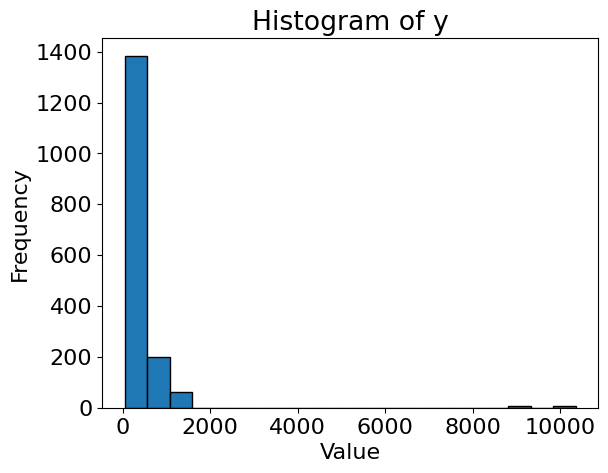

In [14]:
sun_light=sun_light_init
los_sc=los_sc_init
Rsc=Rsc_init
Rdl=Rdl_init
gw_los=gw_los_init
Rgw=gw_rate_init

x=[0]+[1 if los_sc[i-1]==1 and los_sc[i]==0 else 0 for i in range(1,len(los_sc))]
burst_end=np.where(np.array(x) == 1)
print(burst_end)
y=np.diff(burst_end)
plt.hist(y.flatten(), bins=20, edgecolor='black')
plt.title("Histogram of y")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [15]:
print(burst_end[0][1])
z=[0]
for i in range(len(burst_end[0])-1):
    if burst_end[0][i+1]-burst_end[0][i]>600:
        z.append(burst_end[0][i])
z.append(burst_end[0][-1])
print(z)

386
[0, 499, 1948, 12382, 13939, 15463, 16998, 18518, 20044, 21564, 23048, 24615, 26111, 27650, 29141, 30618, 32082, 33538, 34961, 36432, 37870, 39262, 40730, 51115, 52642, 54211, 55698, 57266, 58754, 60312, 61811, 63359, 64872, 66395, 67891, 69373, 70843, 72302, 73724, 75195, 76644, 78077, 79498, 80904, 91401, 92952, 94462, 96011, 97518, 99059, 100575, 102108, 105111, 106646, 108131, 109604, 111067, 112487, 113959, 115416, 116853, 118260, 119713, 130132, 131641, 133218, 134751, 136272, 137753, 139322, 140810, 143873, 145401, 146890, 148366, 149832, 151251, 152722, 154187, 155626, 157024, 158496, 159855, 168819, 170404, 171954, 173461, 175009, 176516, 178059, 179573, 181112, 182632, 184112, 185646, 187127, 188596, 190014, 191486, 192957, 194398, 195787, 197259, 198689, 209145, 210693, 212219, 213748, 215267, 216751, 218314, 219809, 222873, 224396, 225883, 227357, 228778, 230250, 231721, 233169, 234607, 236023, 237473, 247882, 249403, 250961, 252459, 254009, 255515, 257052, 258571, 2601

525601


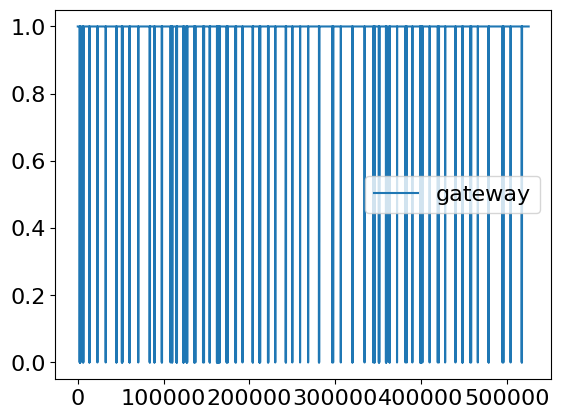

In [16]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
with open(f"{path}/som.pickle", 'rb') as f:
    sun_light_init = pickle.load(f)
f.close()
with open(f"{path}/los.pickle", "rb") as f:
    los_sc_init= pickle.load(f)
f.close()
with open(f"{path}/rd.pickle", "rb") as f:
    Rdl_init = pickle.load(f)
f.close()
with open(f"{path}/rs.pickle", "rb") as f:
    Rsc_init = pickle.load(f)
f.close()
with open(f"{path}/gwlos.pickle", "rb") as f:
    gw_los_init=pickle.load(f)
f.close()
with open(f"{path}/gwr.pickle", "rb") as f:
    gw_rate_init=pickle.load(f)
f.close()
N=len(sun_light_init)
print(N)
M=100
# plt.step(range(N), sun_light_init, label="sun light")
# plt.step(range(N), los_sc_init, label="sc los")
plt.step(range(N), gw_los_init, label="gateway")
plt.legend()
plt.show()

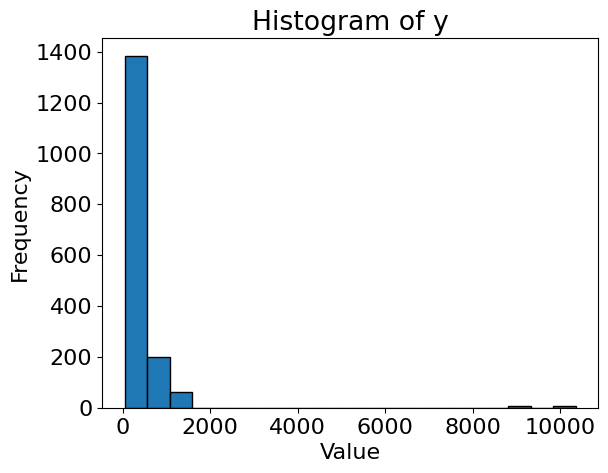

In [17]:
x=[0]+[1 if los_sc_init[i-1]==1 and los_sc_init[i]==0 else 0 for i in range(1,len(los_sc_init))]
burst_end=np.where(np.array(x) == 1)
# print(burst_end)
y=np.diff(burst_end)
plt.hist(y.flatten(), bins=20, edgecolor='black')
plt.title("Histogram of y")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [18]:
print(burst_end[0][1])
z=[0]
for i in range(len(burst_end[0])-1):
    if burst_end[0][i+1]-burst_end[0][i]>600:
        z.append(burst_end[0][i])
z.append(burst_end[0][-1])
print(z)

386
[0, 499, 1948, 12382, 13939, 15463, 16998, 18518, 20044, 21564, 23048, 24615, 26111, 27650, 29141, 30618, 32082, 33538, 34961, 36432, 37870, 39262, 40730, 51115, 52642, 54211, 55698, 57266, 58754, 60312, 61811, 63359, 64872, 66395, 67891, 69373, 70843, 72302, 73724, 75195, 76644, 78077, 79498, 80904, 91401, 92952, 94462, 96011, 97518, 99059, 100575, 102108, 105111, 106646, 108131, 109604, 111067, 112487, 113959, 115416, 116853, 118260, 119713, 130132, 131641, 133218, 134751, 136272, 137753, 139322, 140810, 143873, 145401, 146890, 148366, 149832, 151251, 152722, 154187, 155626, 157024, 158496, 159855, 168819, 170404, 171954, 173461, 175009, 176516, 178059, 179573, 181112, 182632, 184112, 185646, 187127, 188596, 190014, 191486, 192957, 194398, 195787, 197259, 198689, 209145, 210693, 212219, 213748, 215267, 216751, 218314, 219809, 222873, 224396, 225883, 227357, 228778, 230250, 231721, 233169, 234607, 236023, 237473, 247882, 249403, 250961, 252459, 254009, 255515, 257052, 258571, 2601